**Pojet PIC**


**Modèles utilisés :  
                    1.   K plus proches voisins
                    2.   Arbre de décision
                    3.   Réseaux de neurones artificiels**





In [ ]:
#vérifier la version de scikit-learn
import sklearn
print(sklearn.__version__)

1.0.2


In [ ]:
#importer les données – utilisation de la librairie pandas
import pandas as pd
df = pd.read_csv('data_pic.csv')
#dimension du data frame
print(df.shape)
#affichage des premières lignes
df.head()

(1680, 4)


,Reflectivity,Azimut,Elevation,Classe
0,0.11245,-75.6440,63.6643,sol
1,0.17647,-75.6478,63.6661,sol
2,0.23494,-75.6515,63.6678,eau
3,0.13454,-75.6584,63.6710,sol
4,0.19745,-75.6661,63.6746,sol


In [ ]:
#normalisation des données
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

norm = df.iloc[:,:-1] 
classe = df.iloc[:,-1] 

x = norm.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df = df.rename({0: "Reflectivity" , 1: "Azimut", 2: "Elevation"}, axis='columns')
df['Classe'] = classe
df.head()

,Reflectivity,Azimut,Elevation,Classe
0,0.184389,0.035394,0.426026,sol
1,0.296089,0.035378,0.426129,sol
2,0.398106,0.035362,0.426227,eau
3,0.222931,0.035333,0.426410,sol
4,0.332695,0.035300,0.426616,sol


In [ ]:
df=sklearn.utils.shuffle(df)
df.head()

,Reflectivity,Azimut,Elevation,Classe
1092,0.508288,0.644197,0.043957,eau
1443,0.391197,0.978166,0.924653,eau
275,0.503455,0.023506,0.494826,eau
848,0.283213,0.652713,0.126597,sol
145,0.379158,0.028830,0.465551,eau


In [ ]:
#information sur les variables
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 1092 to 1425
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Reflectivity  1680 non-null   float64
 1   Azimut        1680 non-null   float64
 2   Elevation     1680 non-null   float64
 3   Classe        1680 non-null   object 
dtypes: float64(3), object(1)
memory usage: 65.6+ KB
None


In [ ]:
#vérifier la la fréquence absolue des classes ( La somme de chaque type )
print(df.Classe.value_counts())


sol      1001
eau       373
foret     306
Name: Classe, dtype: int64


In [ ]:
#la distribution relative %
print(df.Classe.value_counts(normalize=True))


sol      0.595833
eau      0.222024
foret    0.182143
Name: Classe, dtype: float64


In [ ]:
#subdiviser les données en échantillons d'apprentissage et de test
from sklearn.model_selection import train_test_split
dfTrain, dfTest = train_test_split(df,test_size=0.3,stratify=df.Classe) #30% test et 70% apprentissage

In [ ]:
#vérification des dimensions
print(dfTrain.shape) 
print(dfTest.shape) 


(1176, 4)
(504, 4)


In [ ]:
#vérification des distributions en apprentissage (%)
print(dfTrain.Classe.value_counts(normalize=True))
dfTrain.head()

sol      0.596088
eau      0.221939
foret    0.181973
Name: Classe, dtype: float64


,Reflectivity,Azimut,Elevation,Classe
1610,0.161915,0.954421,0.985053,foret
526,0.313921,0.011087,0.554211,sol
396,0.402137,0.018289,0.521302,eau
543,0.451147,0.010244,0.557812,eau
805,0.313677,0.654141,0.138999,sol


In [ ]:
#vérification des distributions en test (%)
print(dfTest.Classe.value_counts(normalize=True))
dfTest.head()

sol      0.595238
eau      0.222222
foret    0.182540
Name: Classe, dtype: float64


,Reflectivity,Azimut,Elevation,Classe
599,0.238843,0.007372,0.569628,sol
762,0.185436,0.656437,0.158136,sol
1208,0.321005,0.640938,0.005515,sol
729,0.214766,0.658384,0.173691,sol
541,0.347124,0.010299,0.557577,sol


**1. K plus proches voisins**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Sélection du modèle
model=KNeighborsClassifier()# Par défaut: n_neighbors = 5
#Entraînement du modèle
model.fit(dfTrain.iloc[:,:-1], dfTrain.Classe)

KNeighborsClassifier()

In [ ]:
#la matrice de confusion
from sklearn.metrics import confusion_matrix
prediction = model.predict(dfTest.iloc[:,:-1])
conf=confusion_matrix(dfTest.iloc[:,-1],prediction)
print(conf)

[[110   0   2]
 [  0  90   2]
 [  2   0 298]]


1


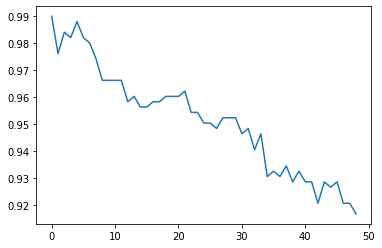

In [ ]:
from sklearn import neighbors
import matplotlib.pyplot as plt
score=[]
best_k=1
best_score=0
for k in range(best_k,50):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(dfTrain.iloc[:,:-1], dfTrain.Classe)
    score.append(model.score(dfTest.iloc[:,:-1], dfTest.Classe))
    if best_score < model.score(dfTest.iloc[:,:-1], dfTest.Classe):
       best_k=k
       best_score=model.score(dfTest.iloc[:,:-1], dfTest.Classe)
print(best_k)   
plt.plot(score)

In [ ]:
#Knn avec la meilleure valeur de k 
model=KNeighborsClassifier(n_neighbors=best_k)
model.fit(dfTrain.iloc[:,:-1], dfTrain.Classe)
prediction = model.predict(dfTest.iloc[:,:-1])
conf=confusion_matrix(dfTest.iloc[:,-1],prediction)
print(conf)

[[111   0   1]
 [  0  88   4]
 [  0   0 300]]


3


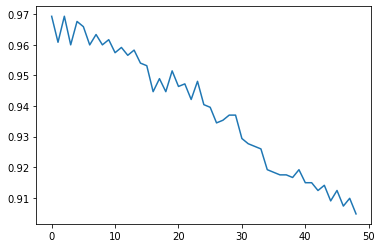

In [ ]:
#Cross-validation: entraîner puis valider le modèle sur plusieurs découpes du train set
from sklearn.model_selection import cross_val_score
val_score=[]
best_k_val=1
best_score=0
for k in range(1,50):
    score=cross_val_score(KNeighborsClassifier(k),dfTrain.iloc[:,:-1], dfTrain.Classe,cv=10).mean()
    val_score.append(score)
    if best_score < score:
       best_k_val=k
       best_score=score
plt.plot(val_score)
print(best_k_val)

In [ ]:
#Knn avec la meilleure valeur de k avec la validation croisée
from sklearn.model_selection import cross_val_predict
model_k=KNeighborsClassifier(n_neighbors=best_k_val)
model_k.fit(dfTrain.iloc[:,:-1], dfTrain.Classe)
prediction_k = model_k.predict(dfTest.iloc[:,:-1])
conf=confusion_matrix(dfTest.iloc[:,-1],prediction_k)
print(conf)

[[108   0   4]
 [  0  88   4]
 [  0   0 300]]


In [ ]:
print("Précision(k=",best_k,"):",model.score(dfTest.iloc[:,:-1], dfTest.Classe))
print("Erreur(k=",best_k,"):",1-model.score(dfTest.iloc[:,:-1], dfTest.Classe))
print("Précision(k=",best_k_val,"):",best_score)
print("Erreur(k=",best_k_val,"):",1-best_score)

Précision(k= 1 ): 0.9900793650793651
Erreur(k= 1 ): 0.009920634920634885
Précision(k= 3 ): 0.969361147327249
Erreur(k= 3 ): 0.030638852672751016


In [ ]:
#Évaluation de la performance par validation croisée
from sklearn.model_selection import cross_val_score
#calcul du score en cross-validation obtenu par le réseau de neurones 
scores = cross_val_score(model_k, dfTrain.iloc[:,:-1], dfTrain.Classe ,cv=10)
#Affichage des résultats
print ("Le score obtenu pour chacun des 10 fold créé est : ",scores)

print ("Cela fait une moyenne de : ",scores.mean())

print ("Et un écart-type de  : ",scores.std())


Le score obtenu pour chacun des 10 fold créé est :  [0.95762712 0.97457627 0.96610169 0.99152542 0.98305085 0.97457627
 0.97435897 0.98290598 0.96581197 0.92307692]
Cela fait une moyenne de :  0.969361147327249
Et un écart-type de  :  0.01801287450891358


**2. Arbre de décision** 

In [ ]:
#instanciation de l'arbre
from sklearn.tree import DecisionTreeClassifier
arbreFirst = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=2)


In [ ]:
#construction de l'arbre
arbreFirst.fit(X = dfTrain.iloc[:,:-1], y = dfTrain.Classe)#min examples pour faire le split / 4 feuilles

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=10)

[Text(0.6, 0.8333333333333334, 'Reflectivity <= 0.367\ngini = 0.562\nsamples = 1176\nvalue = [261, 214, 701]'),
 Text(0.4, 0.5, 'Reflectivity <= 0.18\ngini = 0.358\nsamples = 915\nvalue = [0, 214, 701]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 214\nvalue = [0, 214, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 701\nvalue = [0, 0, 701]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 261\nvalue = [261, 0, 0]')]

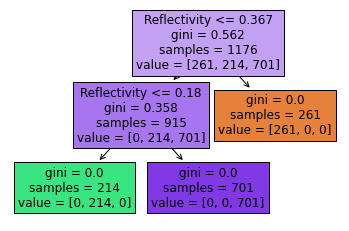

In [ ]:
#affichage graphique de l'arbre 
from sklearn.tree import plot_tree
plot_tree(arbreFirst,feature_names = list(df.columns[:-1]),filled=True,fontsize=12) #on  élimine la variable cible : Classe


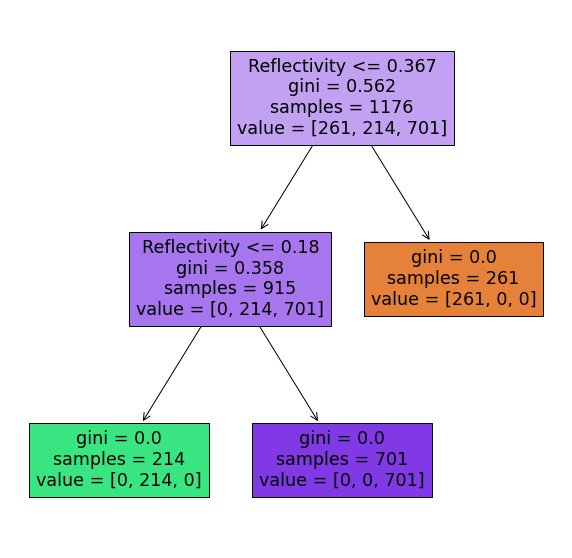

In [ ]:
#affichage plus grand pour une meilleure lisibilité
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10)) #(width , height)
plot_tree(arbreFirst,feature_names = list(df.columns[:-1]),filled=True)
plt.show()


In [ ]:
#importance des variables
import pandas 
impVarFirst={"Variable":df.columns[:-1],"Importance":arbreFirst.feature_importances_}
print(pandas.DataFrame(impVarFirst).sort_values(by="Importance",ascending=False))

       Variable  Importance
0  Reflectivity         1.0
1        Azimut         0.0
2     Elevation         0.0


In [ ]:
#prédiction sur l'échantillon test
predFirst = arbreFirst.predict(X=dfTest.iloc[:,:-1])
#distribution des predictions
import numpy
print(numpy.unique(predFirst,return_counts=True))


(array(['eau', 'foret', 'sol'], dtype=object), array([113,  92, 299]))


In [ ]:
#matrice de confusion
from sklearn import metrics
print(metrics.confusion_matrix(dfTest.Classe,predFirst))#comparer valeur reelle avec valeur predit


[[112   0   0]
 [  0  92   0]
 [  1   0 299]]


In [ ]:
#taux de reconnaissance : diag/total_test
print(metrics.accuracy_score(dfTest.Classe,predFirst))

0.998015873015873


In [ ]:
#taux d'erreur :  1-taux de reconnaissance
print(1.0 - metrics.accuracy_score(dfTest.Classe,predFirst))


0.001984126984126977


In [ ]:
#Évaluation de la performance par validation croisée
from sklearn.model_selection import cross_val_score
#calcul du score en cross-validation obtenu par le réseau de neurones 
scores = cross_val_score(arbreFirst , dfTrain.iloc[:,:-1], dfTrain.Classe ,cv=10)
#Affichage des résultats
print ("Le score obtenu pour chacun des 10 fold créé est : ",scores)

print ("Cela fait une moyenne de : ",scores.mean())

print ("Et un écart-type de  : ",scores.std())


Le score obtenu pour chacun des 10 fold créé est :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cela fait une moyenne de :  1.0
Et un écart-type de  :  0.0


 **3. Réseaux de neurones artificiels**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,),(2,),(3,),(4,),(5,),(6,)
             ]
        }
       ]
clf = GridSearchCV(MLPClassifier(), param_grid, cv=3,
                           scoring='accuracy')
# exécution de grid search
clf.fit(X = dfTrain.iloc[:,:-1], y = dfTrain.Classe)


print("Les paramètres du meilleur modèle:")
print(clf.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Les paramètres du meilleur modèle:
{'activation': 'identity', 'hidden_layer_sizes': (1,), 'solver': 'lbfgs'}


In [ ]:
#Premier apprentissage
mlp = MLPClassifier(activation='identity', hidden_layer_sizes= (1,), solver= 'lbfgs')
mlp.fit(X = dfTrain.iloc[:,:-1], y = dfTrain.Classe)

MLPClassifier(activation='identity', hidden_layer_sizes=(1,), solver='lbfgs')

In [ ]:
#Évaluation de la performance sur l’ensemble de test
predictions=mlp.predict(X=dfTest.iloc[:,:-1])
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix( dfTest.Classe ,predictions))

[[112   0   0]
 [  0  92   0]
 [  1   0 299]]


In [ ]:
print(classification_report(dfTest.Classe,predictions) )

              precision    recall  f1-score   support

         eau       0.99      1.00      1.00       112
       foret       1.00      1.00      1.00        92
         sol       1.00      1.00      1.00       300

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504



In [ ]:
#Évaluation de la performance par validation croisée
from sklearn.model_selection import cross_val_score
#calcul du score en cross-validation obtenu par le réseau de neurones 
scores = cross_val_score(mlp, dfTrain.iloc[:,:-1], dfTrain.Classe ,cv=10)
#Affichage des résultats
print ("Le score obtenu pour chacun des 10 fold créé est : ",scores)

print ("Cela fait une moyenne de : ",scores.mean())

print ("Et un écart-type de  : ",scores.std())


Le score obtenu pour chacun des 10 fold créé est :  [1.         0.99152542 1.         1.         1.         0.99152542
 0.99145299 1.         1.         0.99145299]
Cela fait une moyenne de :  0.9965956830363609
Et un écart-type de  :  0.004169482656977762
